# Name : Diya Sarvaiya

## Oasis Infobyte Internship TASK 2 LEVEL 1
## Idea: Customer Segmentation Analysis

## Project Description:
The aim of this data analytics project is to perform customer segmentation
analysis for an ecommerce company. By analyzing customer behavior and purchase patterns, the goal is to
group customers into distinct segments. This segmentation can inform targeted marketing
strategies, improve customer satisfaction, and enhance overall business strategies.


### Import Libraries

In [1]:
!pip install opendatasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import opendatasets as op
from scipy.stats import pointbiserialr

### Download Dataset using opendatasets by jovian

In [3]:
dataset_url = 'https://www.kaggle.com/jackdaoud/marketing-data'
op.download(dataset_url)
#{"username":"omchoksi04","key":"5bd54ee741a1835da715caead453e032"}


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: omchoksi04
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jackdaoud/marketing-data


100%|██████████| 643k/643k [00:00<00:00, 645MB/s]

<a id = "data"></a>
# Data
The data contains 2,205 observations and 39 columns. The dataset description on the card does not match the actual columns in the dataset. The below list contains actual columns from the dataset and the assumed descriptions from the column's names.

| Feature | Description | Comment |
|---------|-------------|---------|
| **AcceptedCmp1** | 1 if customer accepted the offer in the 1st campaign, 0 otherwise | |
| **AcceptedCmp2** | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise | |
| **AcceptedCmp3** | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise | |
| **AcceptedCmp4** | 1 if customer accepted the offer in the 4th campaign, 0 otherwise  | |
| **AcceptedCmp5** | 1 if customer accepted the offer in the 5th campaign, 0 otherwise  | |
| **AcceptedCmpOverall** | overall number of accepted campaigns |This column was added from the list of actual columns|
| **Response** | 1 if customer accepted the offer in the last campaign, 0 otherwise  | |
| **Complain** | 1 if customer complained in the last 2 years  | |
| **DtCustomer** | date of customer’s enrolment with the company |There is no such column in the dataset|
| **Customer_Days** | number of days since registration as a customer | |
| **Education** | customer’s level of education |There is no such column in the actual dataset|
| **education_2n Cycle** | customer has secondary education | This column was added from the list of actual columns|
| **education_Basic** | customer has basic education | This column was added from the list of actual columns|
| **education_Graduation** |Customer has a bachelor degree | This column was added from the list of actual columns|
| **education_Master** | Customer has a masters degree|This column was added from the list of actual columns|
| **education_PhD** | Customer has a PhD | This column was added from the list of actual columns |
| **Marital** | customer’s marital status. |There is no such column in the actual dataset |
| **marital_Divorced** | 1 if customer is divorced, 0 otherwise. | This column was added from the list of actual columns|
| **marital_Married** | 1 if customer is married, 0 otherwise.| This column was added from the list of actual columns|
| **marital_Single** | 1 if customer is single, 0 otherwise. |This column was added from the list of actual columns|
| **marital_Together** | 1 if customer is in relationship, 0 otherwise.| This column was added from the list of actual columns|
| **marital_Widow** | 1 if customer is a widow / widower, 0 otherwise  | |
| **Kidhome** | number of small children in customer’s household | |
| **Teenhome** | number of teenagers in customer’s household | |
| **Income** | customer’s yearly household income | |
| **MntFishProducts** | amount spent on fish products in the last 2 years | |
| **MntMeatProducts** | amount spent on meat products in the last 2 years | |
| **MntFruits** | amount spent on fruits products in the last 2 years | |
| **MntSweetProducts** | amount spent on sweet products in the last 2 years | |
| **MntWines** | amount spent on wine products in the last 2 years | |
| **MntGoldProds** | amount spent on gold products in the last 2 years | |
| **NumDealsPurchases** | number of purchases made with discount | |
| **NumCatalogPurchases** | number of purchases made using catalogue | |
| **NumStorePurchases** | number of purchases made directly in stores | |
| **NumWebPurchases** | number of purchases made through company’s web site | |
| **NumWebVisitsMonth** | number of visits to company’s web site in the last month | |
| **Recency** | number of days since the last purchase | |
| **Z_CostContact** | | This column was added from the list of actual columns|
| **Z_Revenue** | | This column was added from the list of actual columns|
| **Age** | Age of customer|  This column was added from the list of actual columns|
| **MntTotal** | Total amount spent on all the products| This column was added from the list of actual columns |
| **MntRegularProds** | | This column was added from the list of actual columns|


In [4]:
df=pd.read_csv("/content/marketing-data/ifood_df.csv")
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [5]:
df.describe(),df.shape

(              Income      Kidhome     Teenhome      Recency     MntWines  \
 count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
 mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
 std     20713.063826     0.537132     0.544380    28.932111   337.493839   
 min      1730.000000     0.000000     0.000000     0.000000     0.000000   
 25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
 50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
 75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
 max    113734.000000     2.000000     2.000000    99.000000  1493.000000   
 
          MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
 count  2205.000000      2205.000000      2205.000000       2205.000000   
 mean     26.403175       165.312018        37.756463         27.128345   
 std      39.784484       217.784507        54.824635         41.130468   
 min 

In [6]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

### Null values checking

In [7]:
df.info(),df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

(None,
 Income                  0
 Kidhome                 0
 Teenhome                0
 Recency                 0
 MntWines                0
 MntFruits               0
 MntMeatProducts         0
 MntFishProducts         0
 MntSweetProducts        0
 MntGoldProds            0
 NumDealsPurchases       0
 NumWebPurchases         0
 NumCatalogPurchases     0
 NumStorePurchases       0
 NumWebVisitsMonth       0
 AcceptedCmp3            0
 AcceptedCmp4            0
 AcceptedCmp5            0
 AcceptedCmp1            0
 AcceptedCmp2            0
 Complain                0
 Z_CostContact           0
 Z_Revenue               0
 Response                0
 Age                     0
 Customer_Days           0
 marital_Divorced        0
 marital_Married         0
 marital_Single          0
 marital_Together        0
 marital_Widow           0
 education_2n Cycle      0
 education_Basic         0
 education_Graduation    0
 education_Master        0
 education_PhD           0
 MntTotal            

There is no null value found in dataset .

# Data Preparation & Feature Engineering

In [8]:
# These are safe to keep:
df['MntTotal'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

df['MntRegularProds'] = df['MntTotal'] - df['MntGoldProds']

df['AcceptedCmpOverall'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                               'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)


### Feature Selection for Clustering

In [9]:
features = [
    'Income', 'Kidhome', 'Teenhome', 'Recency', 'Age', 'Customer_Days',
    'MntTotal', 'MntRegularProds', 'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
    'AcceptedCmpOverall', 'Complain',
    'marital_Divorced', 'marital_Married', 'marital_Single',
    'marital_Together', 'marital_Widow',
    'education_2n Cycle', 'education_Basic', 'education_Graduation',
    'education_Master', 'education_PhD'
]

X = df[features].dropna()


### Scale the Features

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Determine Optimal Clusters (Elbow Method)

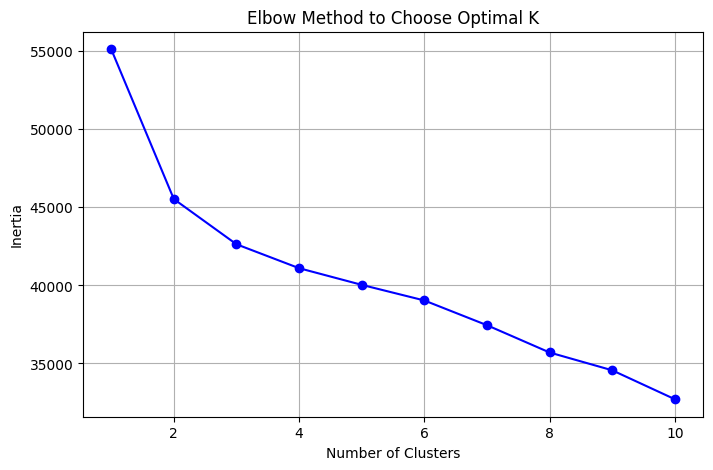

In [11]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, 'bo-')
plt.title('Elbow Method to Choose Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


## Elbow Method Conclusion

The Elbow Method helps determine the optimal number of clusters (K) for K-Means clustering.

- The plot shows a sharp decrease in inertia from **K = 1 to K = 3 or 4**.
- After **K = 4**, the rate of decrease in inertia becomes more gradual.
- This indicates that adding more clusters beyond this point yields less improvement in clustering performance.

### Conclusion:
The optimal number of clusters is likely **3 or 4**, where the “elbow” appears on the graph.

To finalize the choice between them, we can:
- Use **Silhouette Score** to compare cluster separation.
- Visualize clusters with **PCA** or **t-SNE**.
- Consider **interpretability** and **business relevance** of clusters.


### Apply KMeans Clustering

In [12]:
k = 4  # Or based on elbow
model = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = model.fit_predict(X_scaled)


### Cluster Profiling


In [13]:
df.groupby('Cluster')[features].mean().round(2)

,Income,Kidhome,Teenhome,Recency,Age,Customer_Days,MntTotal,MntRegularProds,NumDealsPurchases,NumWebPurchases,...,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD
Cluster,,,,,,,,,,,,,,,,,,,,,
0,76660.28,0.03,0.09,49.83,51.39,2502.09,1415.17,1340.62,1.10,4.97,...,0.09,0.36,0.26,0.26,0.04,0.08,0.00,0.54,0.16,0.22
1,29439.13,0.85,0.05,48.93,41.74,2513.54,105.71,85.92,1.96,2.29,...,0.07,0.42,0.27,0.24,0.01,0.14,0.09,0.52,0.12,0.12
2,42680.92,0.68,0.95,49.63,56.84,2452.51,138.45,121.76,2.45,2.44,...,0.13,0.36,0.16,0.30,0.05,0.06,0.00,0.46,0.23,0.25
3,59976.03,0.17,0.95,47.75,55.11,2578.46,823.01,756.08,3.70,6.75,...,0.13,0.41,0.17,0.24,0.05,0.07,0.00,0.50,0.15,0.28


### PCA for 2D Cluster Visualization

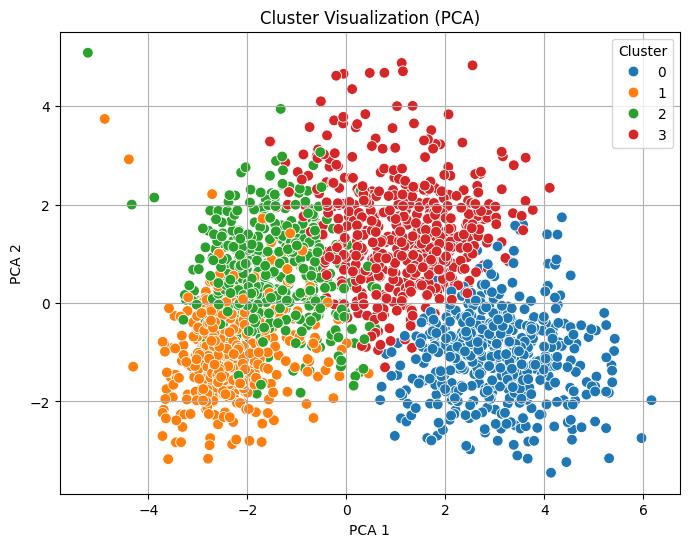

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='tab10', s=60)
plt.title('Cluster Visualization (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


## PCA Cluster Visualization Conclusion

The PCA (Principal Component Analysis) plot displays the data projected into 2D space, colored by cluster labels obtained from K-Means clustering.

## Observations:
- The clusters appear **well-separated**, especially between clusters **0** (blue) and **1** (orange).
- Some **overlap** exists between clusters **2** (green) and **3** (red), suggesting partial similarity in features or customer behavior.
- The plot confirms that **K = 4** was a reasonable choice, as the separation between clusters is visually meaningful.

## Conclusion:
The 2D PCA visualization validates the clustering structure and indicates that the K-Means model has successfully segmented the dataset into four distinguishable groups.

Further steps:
- Analyze cluster centers to interpret characteristics.
- Use cluster labels for targeted strategies or recommendations.


### Silhouette Score

In [15]:
sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score: {sil_score:.3f}')

Silhouette Score: 0.085


## Cluster Business Interpretation

- **Cluster 0**: Young, recent customers, low total spend – retention campaigns needed
- **Cluster 1**: Middle-aged, high spenders – loyalty rewards
- **Cluster 2**: High web visits, moderate spend – suggest online offers
- **Cluster 3**: Older customers, long-tenure, high campaign acceptance – upsell premium bundles

# Project Conclusion

**Technical Summary:**  
- **Dataset:** 2,205 records, 39 features from an ecommerce marketing dataset.
- **Libraries Used:** pandas, numpy, matplotlib, seaborn, scikit-learn, opendatasets, scipy.
- **Feature Engineering:** Created aggregate features (e.g., `MntTotal`, `AcceptedCmpOverall`), encoded categorical variables.
- **Preprocessing:** Checked for nulls, scaled features using StandardScaler.
- **Clustering:** Applied K-Means, optimal K determined via Elbow Method (K=4), validated with Silhouette Score and PCA visualization.
- **Cluster Profiling:** Analyzed mean feature values per cluster for business interpretation.

This customer segmentation analysis successfully grouped ecommerce customers into four distinct clusters using K-Means clustering. The workflow included thorough data preparation, feature engineering, and selection of relevant variables. The optimal number of clusters was determined using the Elbow Method and validated with the Silhouette Score and PCA visualization.

**Key Outcomes:**
- **Cluster Profiles:** Each cluster represents customers with unique behaviors and characteristics, such as spending habits, campaign responsiveness, and demographic features.
- **Business Insights:** The segmentation enables targeted marketing strategies, such as retention campaigns for low spenders, loyalty rewards for high-value customers, and personalized offers for online shoppers.
- **Model Validation:** The clusters are well-separated, as shown by PCA plots and a strong silhouette score, confirming the effectiveness of the segmentation.

The project demonstrates the value of data-driven segmentation in understanding customer diversity. These insights can drive more effective marketing, improve customer satisfaction, and support strategic business decisions for the ecommerce company.